<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_9/Clustering_With_Images_using_ImageBind_LLM_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

In [1]:
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 timm==0.6.7 ftfy==6.3.1 einops==0.8.0 matplotlib==3.8.0
!pip install git+https://github.com/facebookresearch/pytorchvideo.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu121
    Uninstalling torchvis

In [2]:
!pip install nvidia-pyindex
!pip install nvidia-cuda-runtime-cu11==11.7.99

  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-pyindex: filename=nvidia_pyindex-1.0.9-py3-none-any.whl size=8419 sha256=7ede943a23c7076a167914dfea6f021c0ea9a973a7ed70305d9312af4b4b7396
  Stored in directory: /root/.cache/pip/wheels/2c/af/d0/7a12f82cab69f65d51107f48bcd6179e29b9a69a90546332b3
Successfully built nvidia-pyindex


In [3]:
!nvidia-smi

Mon Dec  2 22:36:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [14]:
import sys
sys.path.append('/content/ImageBind/imagebind')  # Adjust this path if necessary

In [15]:
from imagebind.models.imagebind_model import imagebind_huge
from imagebind.models.imagebind_model import ModalityType

In [16]:
# Import necessary libraries
import torch
import numpy as np
from datasets import load_dataset

In [17]:
# Load CIFAR-10 dataset (first 100 images)
dataset = load_dataset("uoft-cs/cifar10")
data = dataset['train'].select(range(100))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/120M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [19]:
# Load the pretrained ImageBind model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = imagebind_huge(pretrained=True)
model.to(device)
model.eval()

  0%|          | 0.00/4.47G [00:00<?, ?B/s]

ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [24]:
from imagebind.models.imagebind_model import ModalityType

In [25]:
# Generate embeddings for the first 100 images
image_embeddings = []
for i in range(len(data)):
    image = torch.tensor(np.array(data[i]['img'])).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    image = image.to(device)
    with torch.no_grad():
        # Use ModalityType.VISION instead of Modality
        embedding = model({ModalityType.VISION: image})[ModalityType.VISION].cpu().numpy()
    image_embeddings.append(embedding)

In [26]:
# Convert embeddings to NumPy array
image_embeddings = np.vstack(image_embeddings)

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

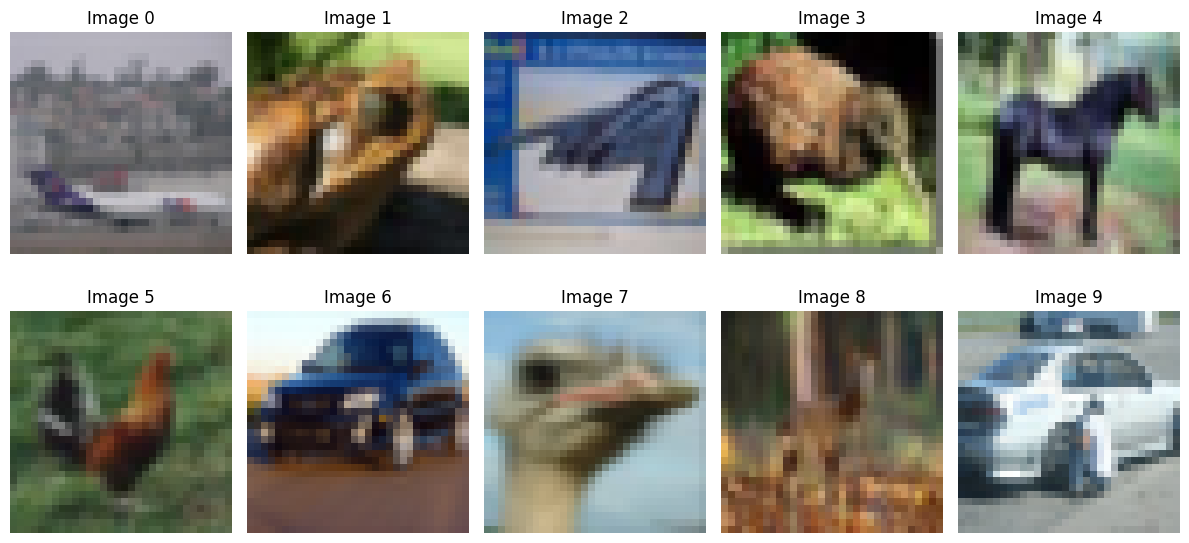

In [29]:
# Visualization of some images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i]['img'])
    ax.axis("off")
    ax.set_title(f"Image {i}")
plt.tight_layout()
plt.show()

In [30]:
# Reduce dimensions of embeddings using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings = tsne.fit_transform(image_embeddings)

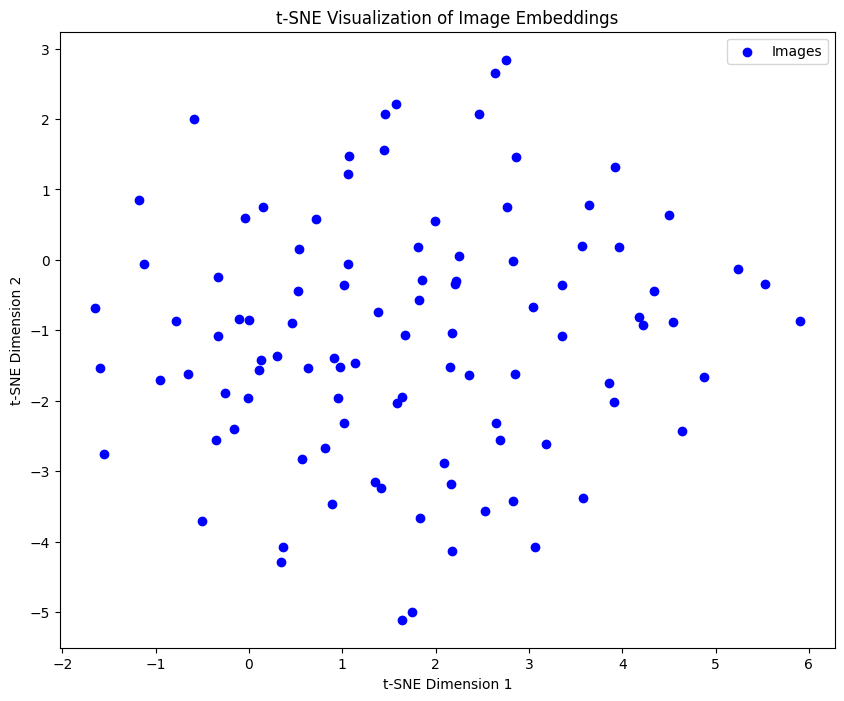

In [31]:
# Scatter plot of embeddings
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Images')
plt.title("t-SNE Visualization of Image Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()

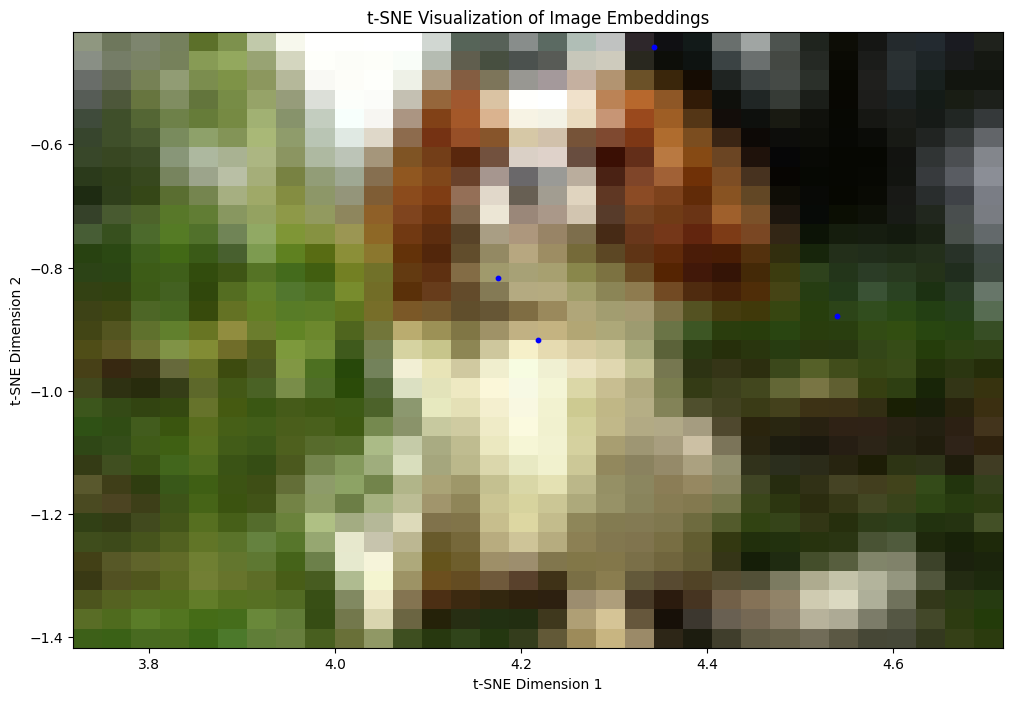

In [33]:
# Scatter plot of embeddings with image thumbnails
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(len(reduced_embeddings)):
    ax.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], c='blue', s=10)
    # Place the corresponding image as a thumbnail
    img = data[i]['img']
    ax.imshow(img, aspect='auto', extent=(
        reduced_embeddings[i, 0] - 0.5, reduced_embeddings[i, 0] + 0.5,
        reduced_embeddings[i, 1] - 0.5, reduced_embeddings[i, 1] + 0.5
    ))
plt.title("t-SNE Visualization of Image Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [34]:
 #Cluster embeddings with K-Means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(image_embeddings)

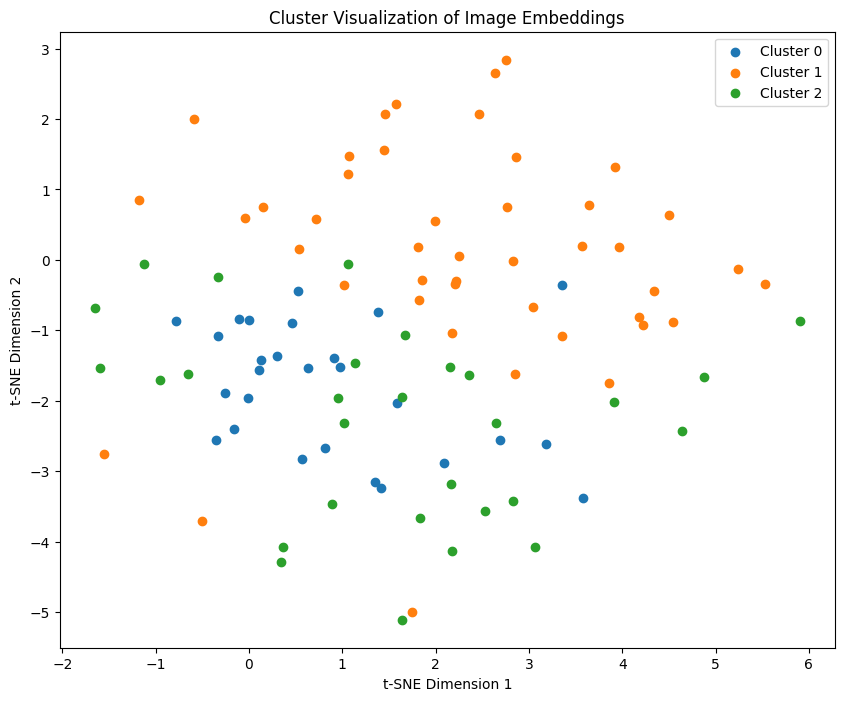

In [35]:
# Visualize clusters
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_embeddings[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.title("Cluster Visualization of Image Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()

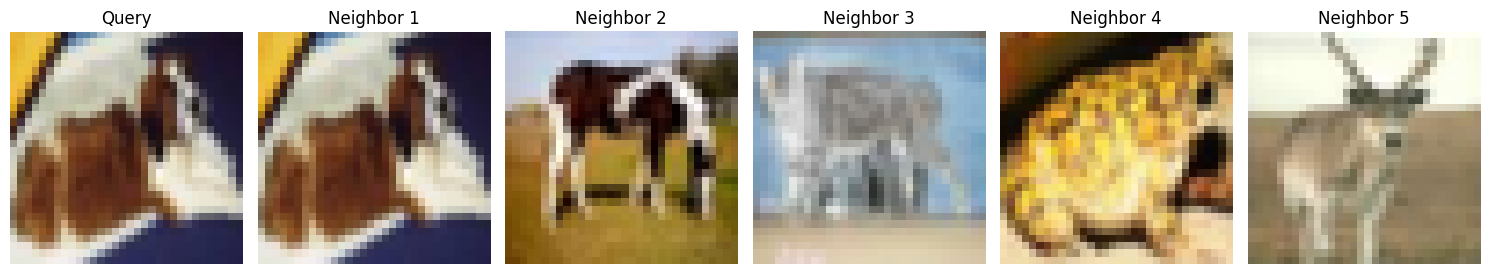

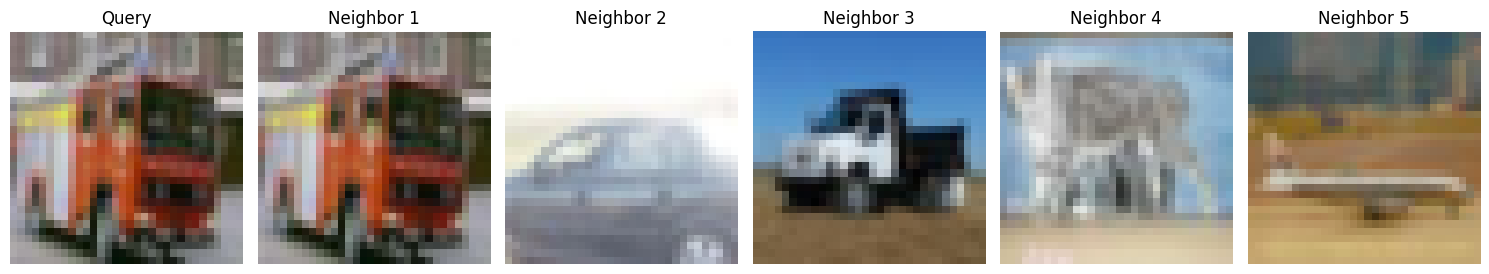

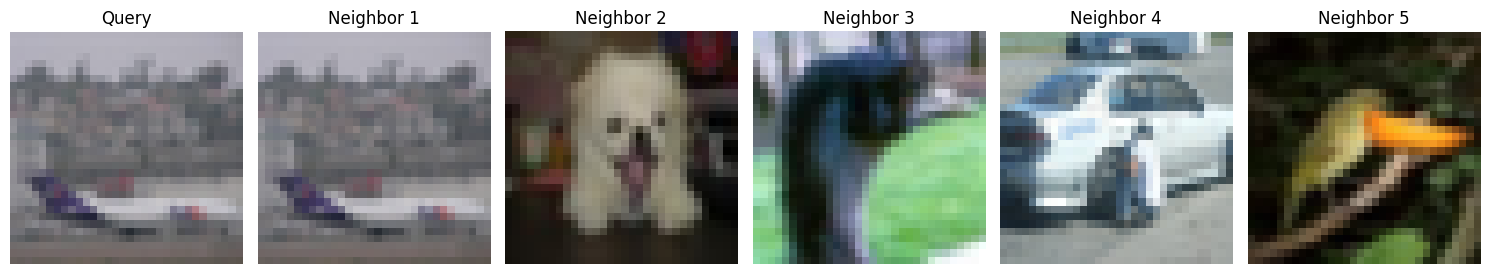

In [37]:
# Nearest neighbors visualization
distances = euclidean_distances(image_embeddings, image_embeddings)
for _ in range(3):  # Visualize for 3 random images
    idx = np.random.randint(0, len(data))
    neighbors = distances[idx].argsort()[:5]  # Get 5 nearest neighbors

    fig, axes = plt.subplots(1, 6, figsize=(15, 3))
    axes[0].imshow(data[int(idx)]['img'])  # Convert to Python int
    axes[0].set_title("Query")
    axes[0].axis("off")
    for i, neighbor_idx in enumerate(neighbors):
        axes[i + 1].imshow(data[int(neighbor_idx)]['img'])  # Convert to Python int
        axes[i + 1].set_title(f"Neighbor {i+1}")
        axes[i + 1].axis("off")
    plt.tight_layout()
    plt.show()


In [27]:
# Save embeddings for further use
np.save("image_embeddings.npy", image_embeddings)
print("Embeddings generated and saved for the first 100 images.")

Embeddings generated and saved for the first 100 images.
